# Solução dos problemas propostos na aula 02 - Interpolação trigonométrica


In [275]:
using PyPlot
using FFTW

In [339]:
#nfftutil(N) = (N % 2 == 0) ? (div(N,2) + 1) : div(N+1,2)
nfftutil(N) = div(N,2) + 1


nfftutil (generic function with 1 method)

<!-- TEASER_END -->

# Problemas


## Problema 1

Seja a seguinte função definida no domínio $-1 < x \le 1$:

$$
y(x) = \left\{\begin{matrix} -1 & x < 0 \\ 1 & x > 0\\ 0 & x=0\end{matrix}\right.
$$

 1. Ache os coeficientes $a_n$ e $b_n$ da série de Fourier
 2. Plote a série de Fourier para diferentes números de termos da série de Fourier. Percebe algo estranho?
 3. Qual a relação desta função com a função $y = |x|$ que estudamos anteriormente?
 4. Escolha diferentes números de pontos e interpole esta função nestes pontos

### Solução

#### Ache os coeficientes $𝑎_n$ e $𝑏_𝑛$ da série de Fourier

Esta é uma função ímpar, portanto os coeficientes $a_n$ são nulos!

$$
b_n = \frac{2}{L_0}\int_{-L_0/2}^{L_0/2} y(x) \cdot \sin\left(\frac{2\pi n x}{L_0}\right)\:dx = 2\int_0^1 \sin\left(\pi n x\right)\:dx = \frac{2}{n\pi}\left(1 - \cos n\pi\right) = \frac{2}{n\pi}\left[1 - (-1)^n\right]
$$


In [276]:
x = range(-1.0, 1.0, length=201);
y0 = 1.0 .* sign.(x)
bn = [2/(π*n) * (1.0 - cos(π*n)) for n in 1:500];

In [277]:
sinseries(x, b, N, L0) = sum(b[n]*sin(2π*n*x/L0) for n in 1:N);

#### Plote a série de Fourier para diferentes números de termos da série de Fourier

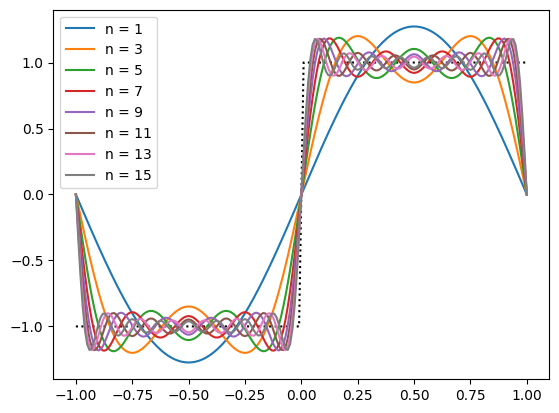

PyObject <matplotlib.legend.Legend object at 0x7f271df27af0>

In [278]:
plot(x, y0, "k:")
for n in 1:2:15
    plot(x, sinseries.(x, Ref(bn), n, 2.0), label="n = $n")
end
legend()

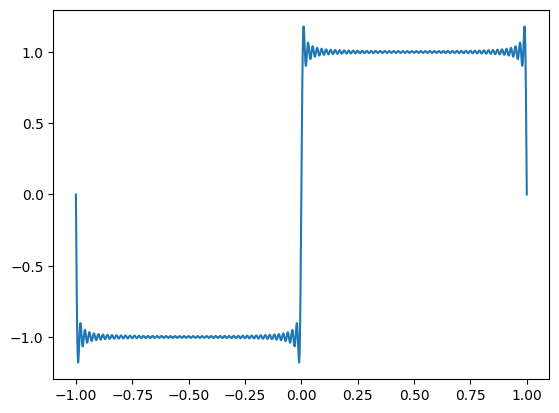

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f271de32e20>

In [280]:
x1 = range(-1, 1, length=1001)
plot(x1, sinseries.(x1, Ref(bn), 100, 2.0))

#### Qual a relação desta função com a função $y = |x|$ que estudamos anteriormente?

Esta função é a derivada da função $y = |x|$!

E a série de $dy/dx$ é formada pelas derivadas da série original!

Existem condições específicas onde se pode derivar a série termo a termo. Mas se as funções forem suaves, derive e integre a vontade! Funciona até para algumas descontinuidades.




#### Escolha diferentes números de pontos e interpole esta função nestes pontos


Lembram da função `myresample`? Do jeito que foi implementada originalmente, só funcionava para N ímpar! Vamos primeiro entender isso.

In [7]:
qpoints(Q, a=-1.0, b=1.0) = range(a, b, length=Q+1)[1:Q]


qpoints (generic function with 3 methods)

In [289]:
Q = 9
x = qpoints(Q, 0.0, 1.0)
dx  = x[2]-x[1]
f = 
y = cos.(2π*f.*x) .+ 2*sin.(2π*f.*x);
Y = fft(y)./Q
freq = fftfreq(Q, 1/dx)

hcat(freq, round.(real.(Y), digits=2), round.(imag.(Y), digits=2))



9×3 Array{Float64,2}:
  0.0   0.0   0.0
  1.0   0.0   0.0
  2.0   0.0   0.0
  3.0  -0.0   0.0
  4.0   0.5   1.0
 -4.0   0.5  -1.0
 -3.0  -0.0  -0.0
 -2.0   0.0  -0.0
 -1.0   0.0  -0.0

In [293]:
Q = 8
x = qpoints(Q, 0.0, 1.0)
dx  = x[2]-x[1]
f = 4
y = cos.(2π*f.*x) .+ 2*sin.(2π*f.*x);
Y = rfft(y)./Q
freq = rfftfreq(Q, 1/dx)

hcat(freq, round.(real.(Y), digits=2), round.(imag.(Y), digits=2))


5×3 Array{Float64,2}:
 0.0  0.0  0.0
 1.0  0.0  0.0
 2.0  0.0  0.0
 3.0  0.0  0.0
 4.0  1.0  0.0

In [10]:
## Resample

function myresample(y, Qout)
    Qin = length(y)
    Nin = Qin ÷ 2 + 1 
    Nout = Qout ÷ 2 + 1
    
    Yin = rfft(y)
    Yout = zeros(ComplexF64, Nout)
    nmin = min(Nout, Nin)
    for i in 1:nmin
        Yout[i] = Qout/Qin * Yin[i]
    end
    
    
    if Qout > Qin  # interpolação
        if iseven(Qin)
            Yout[Nin] /= 2
        end
    elseif Qout < Qin
        if iseven(Qin)
            Yout[Nout] = 2*real(Yout[Nout])
        end
    end
    
    return irfft(Yout, Qout)
end

myresample (generic function with 1 method)

In [299]:
Q0 = 32
x0 = range(-1, 1, length=Q0+1)[1:Q0]
y0 = 1.0 * sign.(x0);

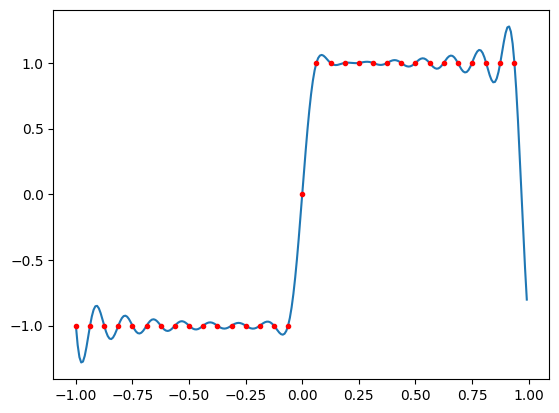

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f271db629a0>

In [301]:
Q1 =  256
x1 = qpoints(Q1, -1, 1)
y1 = myresample(y0, Q1)
plot(x1, y1)
plot(x0, y0, "r.")


## Problema 2

Verifique a ortogonalidade discreta da base trigonométrica, ou seja, 

$$
\sum_{i=1}^Q \phi_n(x_i)\cdot \phi_k(x_i)=0 \qquad k\ne n, k+n \text{ e } k-n \text{ não são múltiplos de}\: Q/2
$$

para 

\begin{align}
\phi_0(x) &= \frac{1}{2}\\
\phi_n(x) &= \cos\left(\frac{2\pi n x}{L_0}\right) \qquad 0\le n \le N \\
\phi_{n+N}(x) &= \sin\left(\frac{2\pi n x}{L_0}\right) \qquad 1\le n \le N 
\end{align}



In [307]:
Q = 10
x = qpoints(Q)

-1.0:0.2:0.8

In [314]:
L0 = 2.0
n = 3; k = 13
sum(sin.((2π*n/L0)*x) .* sin.((2π*k/L0)*x))

4.9999999999999964

## Problema 3

Nos exemplos iniciais usando a DFT, ao se escolher os pontos, foi utilizado o seguinte código:
```julia
L₀ = 1.0; Q = 16; freq=1
x = range(0.0, L₀, length=Q+1)[1:Q]
```
O que acontece se utilzarmos a expressão mais simples a seguir?
```julia
x = range(0.0, L₀, length=Q)
```
O que está acontecendo? Você consegue explicar?

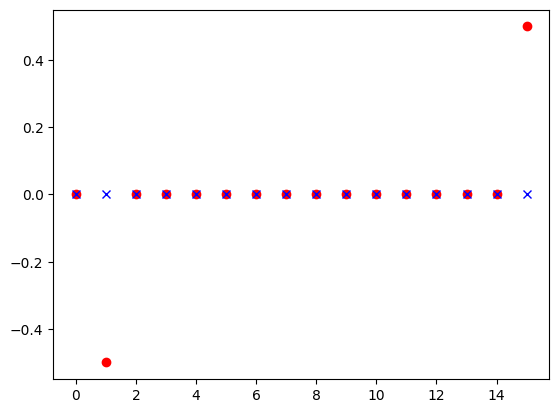

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f26c2843f10>

In [318]:
L₀ = 1.0; Q = 16; freq=1; 
x = range(0.0, L₀, length=Q+1)[1:Q]
y = sin.(freq.*2π.*x); f = (0:Q-1) / L₀
Y = 1/Q * fft(y);
plot(f, imag.(Y), "ro")
plot(f, real.(Y), "xb")

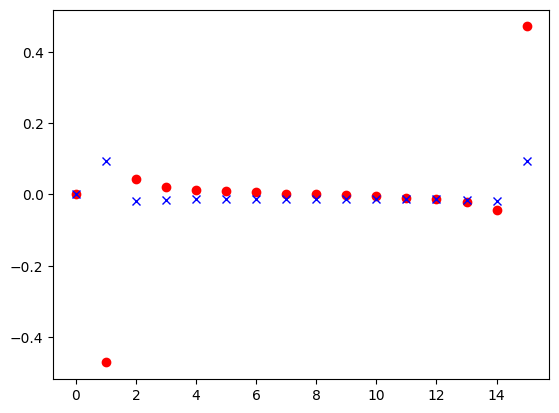

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f2722bfc4f0>

In [16]:
L₀ = 1.0; Q = 16; freq=1; 
x = range(0.0, L₀, length=Q)
y = sin.(freq.*2π.*x); f = (0:Q-1) / L₀
Y = 1/Q * fft(y);
plot(f, imag.(Y), "ro")
plot(f, real.(Y), "xb")


**O que está acontecendo?**

O que a gente quer?  Interpolar a função $\sin2\pi x$ para $0\le x\le 1$ 

Visualmente o que ocorre pode ser visto no gráfico a seguir:


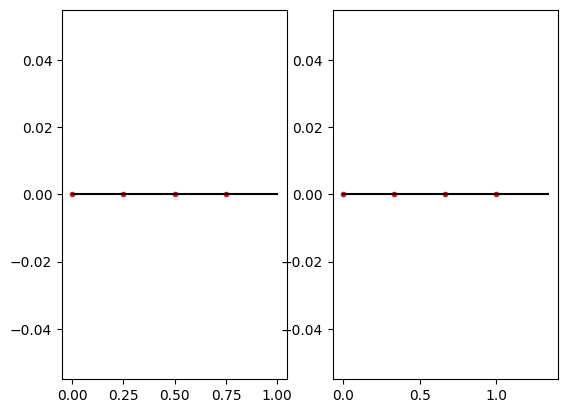

In [17]:
Q = 4; x1 = range(0, 1, length=Q+1)[1:Q]; dx1 = x1[2]-x1[1];
x2 = range(0, 1, length=Q); dx2 = x2[2]-x2[1]
subplot(121); plot(x1, zeros(Q), "r.")
for i in 1:Q
    plot([x1[i], x1[i]+dx1], [0, 0], "k-")
end
subplot(122); plot(x2, zeros(Q), "r.")
for i in 1:Q
    plot([x2[i], x2[i]+dx2], [0, 0], "k-")
end

Temos uma inconsistência!

Como só passamos o número de pontos, na verdade estamos aproximando a função mais um trecho reto:

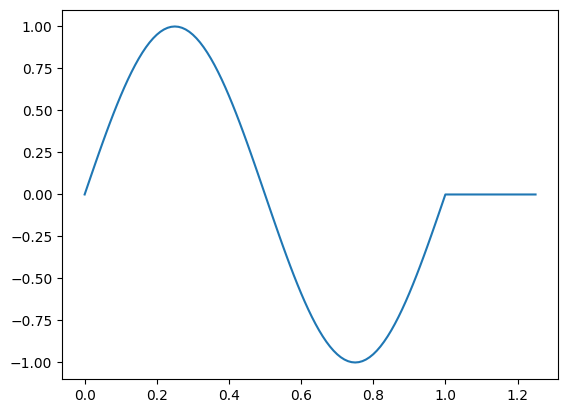

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f2722b675e0>

In [18]:
Q = 4; x1 = range(0, 1, length=Q+1)[1:Q]; dx1 = x1[2]-x1[1]
dx1 = 1.0 / Q; xx1 = 0:0.01:1; yy1 = sin.(2π.*xx1)
xx = [xx1; 1.0 + dx1]; yy = [yy1; 0.0]
plot(xx, yy)

## Problema 4

Implemente a DFT usando a definição. Verifique como aumenta o custo computacional quando o número de pontos aumenta. 

Como foi mostrado, esta operação é uma multiplicação de matriz por vetor. Verifique se invertendo a ordem dos loops afeta o desempenho. 

### DFT - Discrete Fourier Transform (transformada de Fourier discreta)

$$
c_n = X_n = \frac{1}{N}\sum_{k=0}^{N-1} x_k \exp\left(-\frac{2\pi i n k}{N} \right)
$$

Chamando 
$$
w_k = w^k = \exp\left(-\frac{2\pi i k}{N}\right)
$$
Repare que isto pode ser escrito como uma multiplicação de matrizes:

$$
\left(\begin{matrix} X_0 \\ X_1 \\ \vdots \\ X_{N-1}\end{matrix} \right)
= 
\left(\begin{matrix} 1 & 1 & \cdots & 1\\
1 & w & \cdots & w^{N-1} \\
\vdots & \vdots & \ddots &\vdots \\
1 & w^N & \cdots & w^{(N-1)^2}\\
\end{matrix}\right) 
\cdot 
\left(\begin{matrix} x_0 \\ x_1 \\ \vdots \\ x_{N-1}\end{matrix} \right) 
$$




In [319]:
function mydft(x)
    N = length(x)
    X = zeros(ComplexF64,N)
    w = exp(-2π*im/N)

    for i in 1:N
        for k in 1:N
            X[i] += x[k] * w^((i-1)*(k-1))
        end
    end
    
    return X
end

mydft (generic function with 1 method)

In [321]:
x = rand(10)
X1 = mydft(x)
X2 = fft(x)
maximum(abs, X1 - X2)

2.504777312823609e-15

In [54]:
function mydft!(x, X)
    N = length(x)
    w = exp(-2π*im/N)
    for i in 1:N
        Xi = 0.0 + 0.0im
        wi = w^(i-1)
        wk = 1.0 + 0.0im
        for k in 1:N
            Xi += x[k] * wk
            wk *= wi
        end
        X[i] = Xi
    end
    return X
end
mydft(x) = mydft!(x, zeros(ComplexF64, length(x)))

mydft (generic function with 1 method)

In [322]:
x = randn(20)
X1 = mydft(x)
X2 = fft(x)
maximum(abs, X1-X2)

5.907503795392484e-14

## Problema 5

(Desafio) procure na net ou em algum livro como implementar a FFT. Tente!

Com $N$ divísível por 2:
\begin{align}
X[k] &= \sum_{r=0}^N x[r] W_N^{rk} \qquad W_N = \exp\left(-\frac{2\pi i}{N}\right)\\
X[k] &= \sum_{r=0}^{N/2-1} x[2r] W_N^{2rk} + \sum_{r=0}^{N/2-1} x[2r+1] W_N^{(2r+1)k} \\
X[k] &= \sum_{r=0}^{N/2-1} x[2r] W_{N/2}^{rk} + W_N^k\sum_{r=0}^{N/2-1} x[2r+1] W_{N/2}^{rk} \\
X[k] &= X_{par}[k] + W_N^k\cdot X_{ímpar}[k]
\end{align}

In [323]:
function myfft_rec(x)
    N = length(x)
    n1 = div(N,2)
    if N==1
        return [x[1]]
    elseif N % 2 != 0
        error("O tamanho deve ter potência de 2")
    else
        Xe = myfft_rec(x[1:2:end])
        Xo = myfft_rec(x[2:2:end])
        factor = exp.(-2π*im .* (0:N-1) ./ N)
        return[Xe .+ factor[1:n1] .* Xo; 
            Xe .+ factor[(n1+1):end] .* Xo]
        
    end
end    

myfft_rec (generic function with 1 method)

In [324]:
x = randn(2^10)
X1 = myfft_rec(x)
X2 = fft(x)
maximum(abs, X1 - X2)

9.532931148469529e-14

In [326]:
@time myfft(x);
@time fft(x);

  0.005355 seconds (17.39 k allocations: 1.628 MiB)
  0.000071 seconds (51 allocations: 35.109 KiB)


### Jeito mais inteligente
(retirado do livro Random Vibratrions, Spectral & Wavelet Analysis de D. E. Newland)

In [328]:
function bitrev(n, bits)
    nrev = zero(n)
    N = 1 << bits
    nrev = n
    
    for i in 1:bits-1
        n >>= 1
        nrev <<= 1
        nrev |= n & 1
    end
    nrev &= N-1
    return nrev
end
function swaparr!(x)
    N = length(x)
    n = Int(log2(N))
    
    for i in 1:N
        ir = bitrev(i-1, n)+1
        if ir > i
            tmp = x[i]
            x[i] = x[ir]
            x[ir] = tmp
        end
    end
end
    

swaparr! (generic function with 1 method)

In [329]:
function myfft!(x)
    N = length(x)
    n = Int(log2(N))
    swaparr!(x)  
    m = 1
    while true
        U = 1.0+0.0im
        j = 1
        k = 2^(m-1)
        W = exp(-π*im/k)
        while true
            l = j
            while true
                t = x[l+k] * U
                x[l+k] = x[l] - t
                x[l] = x[l] + t
                
                l = l + 2^m
                if l > 2^n
                    break
                end
            end
            U = U * W
            j = j + 1
            if j > k
                break
            end
        end
        m = m + 1
        if m > n
            break
        end
    end
    return x
end
    

myfft! (generic function with 1 method)

In [336]:
n = 20
N = 2^n

x = rand(N) + rand(N) .* im
@time X1 = fft(x)
@time X2 = myfft!(copy(x))

maximum(abs,X1-X2)

  0.042963 seconds (51 allocations: 16.003 MiB)
  0.392928 seconds (2 allocations: 16.000 MiB)


2.055062868211651e-8

## Problema 6

A transformada de Fourier está diretamente relacionada com a série de Fourier e é dada por:
$$
X(\omega) = \frac{1}{2\pi} \int_{-\infty}^\infty x(t)e^{-i\omega t}\: dt
$$

 ### 6.1 Calcula a transformada de Fourier para a função 
  $$
  x(t) = \left\{\begin{matrix} 1 & -1 < x < 1 \\ 0 & x \ge 1\end{matrix}\right.
  $$
$$
X(\omega) = \frac{1}{2\pi}\int_{-\infty}^\infty x(t)e^{-i\omega t}\: dt = 
\frac{1}{2\pi}\int_{-1}^1 e^{-i\omega t}\: dt = \frac{1}{2\pi}\left.\frac{i e^{-i\omega}}{\omega}\right|_{-1}^1 = 
\frac{\sin\omega}{\pi\omega}
$$
$$
\text{sinc} = \frac{\sin\pi x}{\pi x}
$$

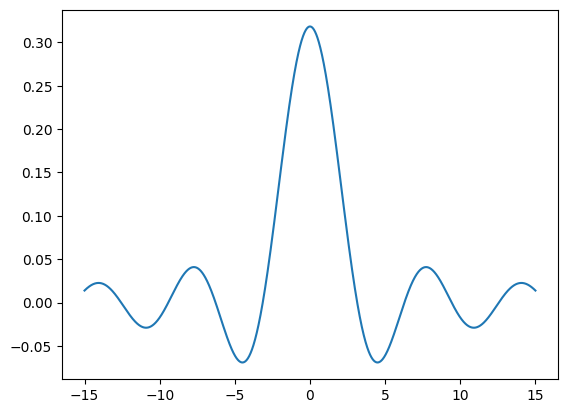

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f2722e57160>

In [207]:
x = -15:0.01:15
y = 1/π .* sinc.(x./π)
plot(x,y)

### 6.2 Discretize a função e use a FFT para calcular a transformada.

$$
X(\omega) = \frac{1}{2\pi}\int_{-\infty}^\infty x(t)e^{-i\omega t}\: dt = 
\frac{1}{2\pi}\int_{-T_0/2}^{T_0/2} e^{-i\omega t}\: dt \approx \frac{1}{2\pi} \sum_{k=0}^{N-1} x(t_k) e^{-i\omega t_k}\Delta t \qquad \Delta t = \frac{T_0}{N} \qquad t_k = -\frac{T_0}{2} + k\cdot \Delta t
$$

Ou seja, 

$$
X(\omega) \approx \frac{1}{2\pi} \sum_{k=0}^{N-1} x(t_k) e^{-i\omega t_k}\Delta t = 
\frac{\Delta t}{2\pi} \sum_{k=0}^{N-1} x_k e^{-i\omega(-T_0/2 + k\Delta t)} = 
\frac{\Delta t}{2\pi}\cdot e^{\frac{i\omega T_0}{2}}\cdot \sum_{k=0}^{N-1} x_k e^{-i\omega k\Delta t} = 
$$



Discretizando $\omega = \omega_j = j\cdot \omega_0 = \frac{2\pi j}{T_0}$, $0 \le j < N$

$$
X_j = X(\omega_j) = \frac{\Delta t}{2\pi}\cdot e^{\frac{2\pi j T_0}{2{T_0}}}\cdot \sum_{k=0}^{N-1} x_k e^{-\frac{2\pi i j\omega k\Delta t}{N\cdot \Delta t}} = 
 \frac{\Delta t}{2\pi}\cdot e^{\pi i j}\cdot \sum_{k=0}^{N-1} x_k \exp\left(-\frac{2\pi i j k}{N}\right)
$$
ou seja
$$
X_j = X(\omega_j) =
\frac{\Delta t}{2\pi}\cdot e^{\pi i j}\cdot \sum_{i=0}^{N-1} x_k \exp\left(-\frac{2\pi i j k}{N}\right)
$$
A somatória no ultimo termo é a DFT. O termo $e^{\pi i j}$ é corresponde à translação.

In [266]:
Q = 32
Δt = 2.0 / Q
x = ones(Q)
X0 = rfft(x)
N = length(X)
for j in 0:N-1
    X0[j+1] = X0[j+1] * Δt/(2π) * exp(π*j*im) 
end
freq0 = rfftfreq(Q, 1/Δt)
w = 2π*freq0;

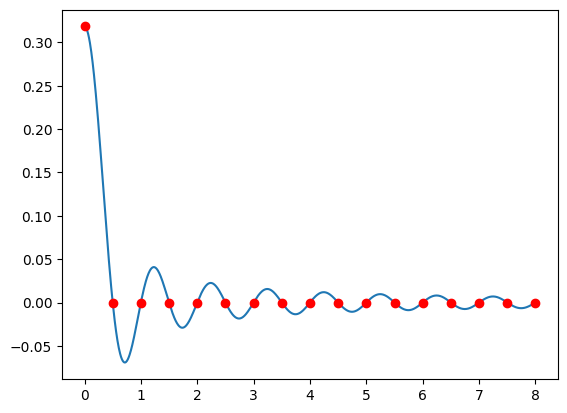

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f271e0f9ca0>

In [267]:
ww = range(0, maximum(w), length=1001)
yy = 1/π .* sinc.(ww./π)
plot(ww./(2π), yy)
plot(freq0, real.(X0), "ro")

### 6.3 Tente verificar o que acontece se você adiciona zeros à esquerda e à direita da função discretizada.
 


In [337]:
Q1 = 32; nn = 1; x = [zeros(nn*Q1); ones(Q1); zeros(nn*Q1-1)]
Q = length(x); Δt = 2.0 / Q1
X = rfft(x); N = length(X)
for j in 0:N-1
    X[j+1] = X[j+1] * Δt/(2π) * exp(π*j*im) 
end
freq = rfftfreq(Q, 1/Δt); w = 2π*freq;

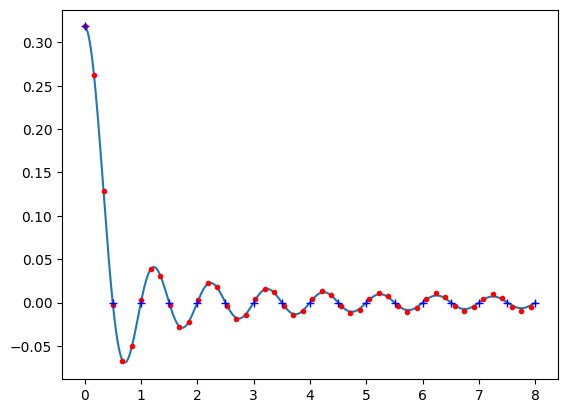

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f27202d40d0>

In [338]:
plot(ww./(2π), yy); plot(freq, real.(X), "r.")
plot(freq0, real.(X0), "b+")

## Problema 7

Faça alguns exemplos do pacote `ApproxFun` (<https://github.com/JuliaApproximation/ApproxFun.jl>)
